In [10]:
import rasterio
import numpy as np
import skimage
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
from rasterio.windows import Window
import matplotlib
from matplotlib import pyplot
from skimage.segmentation import slic
from skimage.segmentation import watershed
from rasterio import features
from geopandas import GeoDataFrame
from collections import OrderedDict

In [11]:
%pwd

'/home/jovyan/learn_python'

In [71]:
src = rasterio.open("images/top_potsdam_6_11_RGBIR.tif")

In [13]:
src.count

4

In [49]:
src.width

6000

In [50]:
src.height

6000

In [16]:
image = src.read([1,2,3])

In [17]:
type(image)

numpy.ndarray

In [ ]:
##                                       (x,y,rows, cols)
imagew = src.read([1,2,3], window=Window(2500,2500,512,512))

In [ ]:
type(imagew)

In [ ]:
show(imagew)

In [ ]:
#This is a SLIC algorithm
slic_params = {'compactness': 20,
              'n_segments': 50,
              'multichannel': True}
imaget = imagew.transpose(1, 2, 0)
rout = slic(imaget, **slic_params).astype('int32')

In [ ]:
type(rout)

In [ ]:
#This is a quickshift algorithm
from skimage.segmentation import quickshift

quickshift_params = {'ratio': 0.3,
              'kernel_size': 10,
                    'max_dist': 100}
imaget = imagew.transpose(1, 2, 0)
rout = quickshift(imaget, **quickshift_params).astype('int32')

In [ ]:
fig = pyplot.subplots(1, 1, figsize=(18,18))
show(rout)

In [ ]:
type(rout)

In [ ]:
rout.shape

In [ ]:
temp= rout[:, :, np.newaxis]
temp.shape

In [ ]:
output = rout[:, :, np.newaxis].transpose(2, 0, 1)
output.shape

In [ ]:
ras = output[0]
ras.shape

In [ ]:
src

In [67]:
src.transform

Affine(0.05, 0.0, 367276.5,
       0.0, -0.05, 5807362.6)

In [68]:
from rasterio import transform
transform.xy(src.transform, 2500, 2500)

(367401.525, 5807237.574999999)

In [ ]:
from rasterio.transform import Affine
new_transform = Affine(0.05, 0.0, 367401.525, 0.0, -0.05, 5807237.574999999)


In [ ]:
shps = features.shapes(ras, new_transform)
records = []

In [ ]:
ras = output[0]
        
shps = features.shapes(ras, transform=new_transform)
records = []

for id, shp in enumerate(shps):
    if shp[1] != 0:
        item = {'geometry': shp[0], 'id': id+1, 'properties': 
                OrderedDict([('dn', np.int(shp[1]))]),
                'type': 'Feature'}
        records.append(item)

vec = GeoDataFrame.from_features(records)
vec.crs = src.crs

In [ ]:
vec = GeoDataFrame.from_features(records)
vec.crs = src.crs

In [ ]:
vec.to_file("quichshift3.shp")

In [99]:
src = rasterio.open("images/top_potsdam_6_11_RGBIR.tif")

In [121]:
x_corner = 2744
y_corner = 2744
x_inc = 512

In [122]:
x_corner

2744

In [ ]:
## This is the loop for image windows

(367413.7, 5807225.399999999)


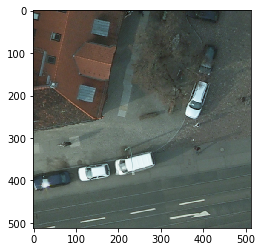

(367439.3, 5807225.399999999)


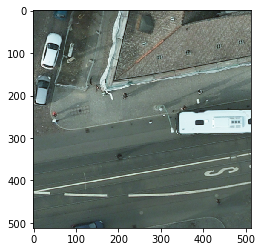

(367464.9, 5807225.399999999)


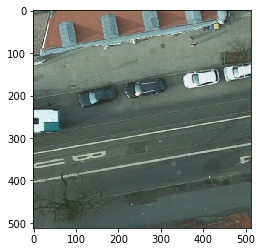

(367490.5, 5807225.399999999)


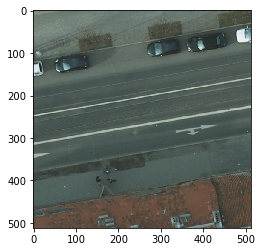

(367516.1, 5807225.399999999)


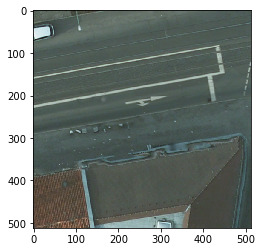

In [134]:
x_corner = 2744
y_corner = 2744
x_inc = 512
for i in range(x_corner, x_corner+x_inc*5,x_inc):
    #x_corner = x_corner+x_inc
    img = src.read([1,2,3], window=Window(i,y_corner,x_inc,x_inc))
    print(src.transform*(i,y_corner))
    show(img)

In [127]:
##                                       (x,y,rows, cols)
imagew = src.read([1,2,3], window=Window(3256,2744,512,512))

In [128]:
type(imagew)

numpy.ndarray

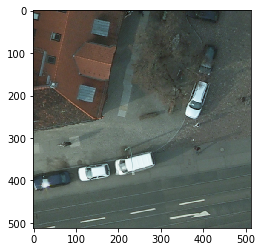

In [89]:
show(imagew)